#Parcial 1 Gestión de datos, Camilo Ernesto Cano Ortega

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline  

In [3]:
! git clone https://github.com/datapreparation-javeriana/exam1

Cloning into 'exam1'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [64]:
Notas = pd.read_csv("./exam1/data/StudentsPerformance_exam1.csv")
Notas

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,NaN,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,NaN,65.0
998,NaN,group D,some college,standard,completed,68.0,78.0,77.0


## 1er Punto

In [6]:
Notas.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

- Variable 1. Gender, Categorica
- Variable 2. Ethnicity. Categorica
- Variable 3. Patental Education, Categorica
- Variable 4 Lunch Categorica
- Variable 5 Preparation, Categorica

In [13]:
print(Notas.gender.unique())
print(Notas['race/ethnicity'].unique())
print(Notas['parental level of education'].unique())
print(Notas['lunch'].unique())
print(Notas['test preparation course'].unique())

['non-binary' 'female' 'male' nan]
['group B' 'group C' 'group A' 'group D' 'group E' nan]
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
['standard' 'free/reduced' nan]
['none' 'completed' nan]


Variable 6,7,8. Scores Math, reading and writing continua

In [8]:
Notas.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# 2do Punto

Se evidencia que el dataset, tiene entre un 4-6% de datos nulos, por falta de calidad de datos, la variable que tiene mayor ausencia de información es la variable education de los padres. 

Eliminar los datos con datos faltantes seria una perdida enorme de información, esto se debe a que en el mejor de los casos en donde contemplamos todas las variables perdemos más del 36% de la información y para los datos continuos perdemos más del 16%

In [16]:
(Notas.isna().sum()/1000)*100

gender                         4.7
race/ethnicity                 4.5
parental level of education    6.0
lunch                          5.4
test preparation course        4.1
math score                     5.1
reading score                  4.8
writing score                  4.9
dtype: float64

In [28]:
print("- - - -- - - - - - -")
print("Eliminar datos con algun na")
print(1000-Notas.dropna().shape[0])
print("- - - -- - - - - - -")
print("- - - -- - - - - - -")
print("Eliminar datos con algun na en variables continuas")
1000-Notas.dropna(subset=['math score', 'reading score','writing score']).shape[0]

- - - -- - - - - - -
Eliminar datos con algun na
330
- - - -- - - - - - -
- - - -- - - - - - -
Eliminar datos con algun na en variables continuas


140

Se sugiere para esta situación una imputación de datos, para los datos categoricos su valor mas cercano en el dataset, mientras que para los datos continuos, por el promedio o la mediana. Cabe anotar que no es el mejor método, dado que para un problema de este tipo podría optarse por modelos de imputación mas sofisticados (KNN, Multinomiales, muestreos) pero al ser el tiempo una restricción y se asume que no se puede devolver los datos, el valor más cercano en el data set.

Se omite el proceso de modas, dado que es más probable incurrir en sesgos, producto de sobrecargar una categoria.

In [40]:
Notas1=Notas

In [42]:
lista1=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

In [54]:
Notas1[lista1]=Notas1[lista1].fillna(method="ffill")

In [58]:
a=Notas1["math score"].mean()
Notas1["math score"]=Notas1["math score"].fillna(a)
a=Notas1["reading score"].mean()
Notas1["reading score"]=Notas1["reading score"].fillna(a)
a=Notas1["writing score"].mean()
Notas1["writing score"]=Notas1["writing score"].fillna(a)

In [59]:
(Notas1.isna().sum()/1000)*100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

#3er Punto

Se revisa tanto, los datos con y sin imputación y se evidencia una leve diferencia en los estadisticos mostrados, las tres materias presentan un comportamiento similar, la media y la varianza es casi igual y tienen una distribución similar en los puntajes de 1 a 100; con respecto a su uniformidad podemos entrar a debates, dado que las cifras del percentil 25, son muy cercanas a la mediana y la media, razón por la cual soprechamos que tiene un sezgo a la derecha, y debe ser leptocurtica, con una gran cantidad de datos entre los puntajes de 50 a 70 puntos. La mejor prueba con respecto a las otras materias es lectura, que tiene unos ligeros puntos sobre las demás materias

In [66]:
List2=["math score","reading score","writing score"]
Notas1[List2].describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.120126,69.257353,68.181914
std,14.808903,14.197236,14.765078
min,0.000000,17.000000,10.000000
25%,58.000000,60.000000,58.000000
50%,66.120126,69.257353,68.181914
75%,76.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


In [65]:
Notas[List2].describe()

,math score,reading score,writing score
count,949.000000,952.000000,951.000000
mean,66.120126,69.257353,68.181914
std,15.202026,14.551115,15.141074
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# 4to Punto

Se evidencia que existe una correlación mucho más altas en las pruebas de lectura y escritura, comparada con su relación con matemáticas. Esto puede tener sentido dado que los planes de lectoescrituras de los colegios desarrollan esta habilidad a la par a diferencia de matemáticas

In [70]:
Notas1[List2].corr()

,math score,reading score,writing score
math score,1.000000,0.780654,0.752298
reading score,0.780654,1.000000,0.909286
writing score,0.752298,0.909286,1.000000


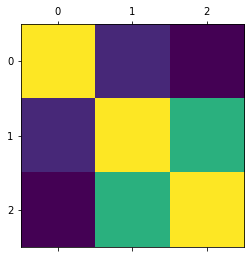

In [71]:
corr_df = Notas1[List2].corr()
plt.matshow(corr_df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


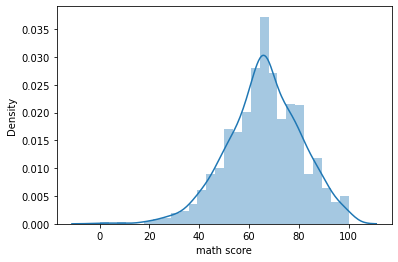

In [94]:
sns.distplot(Notas1["math score"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


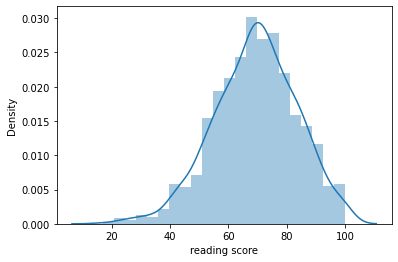

In [95]:
sns.distplot(Notas1["reading score"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


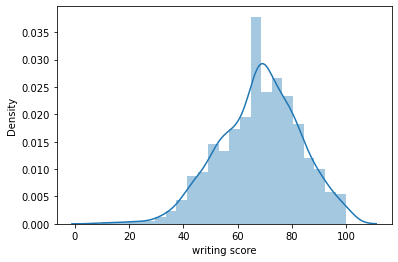

In [96]:
sns.distplot(Notas1["writing score"])

# Punto 5

Para el caso de matemáticas el género masculino tuvo los mejores promedio, seguido por muy poco de la población no.binaria. Se evidencia que los percentiles mayores a 75% fueron más altos en los hombre. Si se evidencia un sezago en la población femenina de entre 3-6 puntos, comparados con los demás géneros.

In [73]:
Notas1[["gender","math score"]].groupby("gender").describe()

math score                                                     
                count       mean        std   min   25%   50%   75%    max
gender                                                                    
female          445.0  63.616905  15.212169   0.0  54.0  65.0  74.0  100.0
male            404.0  68.283769  14.164683  27.0  59.0  68.0  79.0  100.0
non-binary      151.0  67.708351  14.240887  23.0  60.0  67.0  76.0  100.0

# 6to Punto

Se evidencia que está población si tiene una mayor influencia sobre padres con escolaridad mayor al high school, pero no necesariamente un nivel de postgrado aumenta los scores.

In [76]:
p85=Notas1["writing score"].quantile(0.85)

In [84]:
Notas2=Notas1[Notas1["writing score"]>p85].groupby("parental level of education").size().reset_index().rename(columns={0: "Cont"}).sort_values(by=["Cont"])
Notas2

,parental level of education,Cont
2,high school,10
5,some high school,16
3,master's degree,20
1,bachelor's degree,27
4,some college,35
0,associate's degree,38


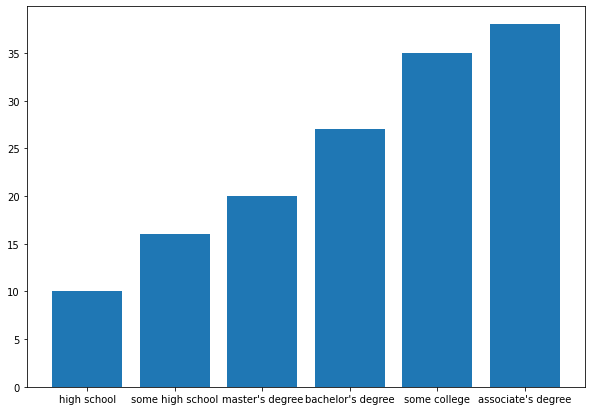

In [88]:
fig = plt.figure(figsize =(10, 7))
plt.bar(Notas2["parental level of education"],Notas2["Cont"])
plt.show()

# 7mo Punto

Solo 24, estudiantes de una población de 1000, supera los scores mayores a 90, un total de un 2.4%; de los cuales 13 terminaron el curso de preparación.

In [90]:
Notas3=Notas1[(Notas1["writing score"]>=90) & (Notas1["math score"]>=90) & (Notas1["reading score"]>=90)]
Notas3.shape

(24, 8)

In [93]:
Notas3.groupby("test preparation course").size()

test preparation course
completed    13
none         11
dtype: int64